In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
data = loadmat('ex3data1.mat')

In [3]:
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
X = data['X']
y = data['y']
y[y == 10] = 0

In [5]:
from skimage import io
for i in range(1, 6):
    file = 'test' + str(i) + '.png'
    img = 1 - io.imread(file, as_grey=True)
    img = np.rot90(img)
    img1 = img.copy()
    for i in range(0, img1.shape[0]):
        img[19 - i, :] = img1[i, :]
    img = img.ravel()
    img  = img.reshape(1, img.shape[0])
    X = np.append(X, img , axis=0)
    
y = np.append(y, [[5],[1],[2],[0],[5]] , axis = 0)
    

In [6]:
X.shape

(5005, 400)

In [7]:
y.shape

(5005, 1)

In [8]:
y_n = np.zeros(shape = (X.shape[0], 10))
for i in range(0, X.shape[0]):
    y_n[i, y[i]] = 1

In [9]:
y_n

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

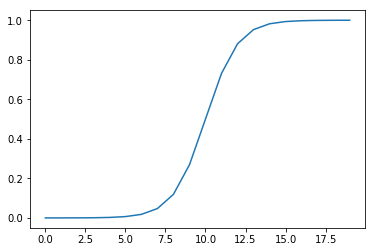

In [11]:
plt.plot(sigmoid(np.array(range(-10, 10))))

In [12]:
def cost(theta, X, y, lambda_r):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(X)
    term1 = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    term2 = np.multiply(1-y, np.log(1-sigmoid(X*theta.T)))
    calc = np.sum(term1 - term2)
    reg = (lambda_r/(2 * m)) * np.sum(np.power(theta[0,1:], 2))
    return calc/m + reg

In [13]:
def gradient(theta, X, y, lambda_r):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(X)
    error = sigmoid(X * theta.T) - y
    term = (lambda_r/m)*np.sum(theta[0:1:])
    grad = (X.T * error)/m + term
    return np.array(grad).ravel()

In [14]:
initial_theta = np.zeros(X.shape[1])
learning_rate = 1

In [15]:
from scipy.optimize import minimize
import scipy.optimize as opt
new_theta = np.zeros([X.shape[1],10])
for i in range(0, 10):
    print("Training for", i,"classification..............")
    fmin = minimize(fun=cost, x0=initial_theta, args=(X, y_n[:,i].reshape(y_n.shape[0], 1), learning_rate), method='TNC', jac=gradient)
    new_theta[:, i] = fmin.x

Training for 0 classification..............
Training for 1 classification..............
Training for 2 classification..............
Training for 3 classification..............
Training for 4 classification..............
Training for 5 classification..............
Training for 6 classification..............
Training for 7 classification..............
Training for 8 classification..............
Training for 9 classification..............


In [16]:
def predict(new_theta, X):
    theta = np.matrix(new_theta)
    X = np.matrix(X)
    
    prediction = X * theta
    
    return prediction

In [17]:
p = sigmoid(predict(new_theta, X))

In [19]:
ans = np.array(range(0, X.shape[0]))
count = 0
for i in range(0, X.shape[0]):
    ans[i] = p[i,:].argmax()
    if y[i] == ans[i]:
        count = count + 1
print("Accuracy : ",(count*100/X.shape[0]))

Accuracy :  93.8061938061938


In [20]:
from skimage import io
img = 1 - io.imread('test5.png', as_grey=True)
img = np.rot90(img)
img1 = img.copy()
for i in range(0, img1.shape[0]):
    img[19 - i, :] = img1[i, :]

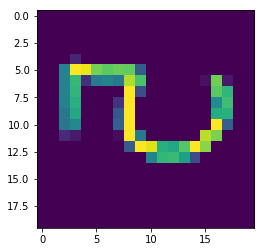

In [21]:
plt.imshow(img)

In [22]:
image = np.matrix(img.ravel())
predict = image * new_theta
predict

matrix([[-10.05345499,  -5.14003732, -15.60727619,  -1.95119837,
          -6.67265152,  -0.13397114, -10.05548036,  -2.4097996 ,
          -7.31513409,  -9.99684758]])

In [23]:
a = predict.argmax()
predict[0,a] = -1000
b = predict.argmax()
print("Calculated no : ",a, "and ", b)

Calculated no :  5 and  3


In [24]:
y

array([[0],
       [0],
       [0],
       ..., 
       [2],
       [0],
       [5]])

array([2])

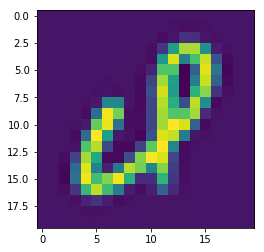

In [25]:
no = 1100
plt.imshow(X[no,:].reshape(20,20))
y[no]

In [26]:
p[100,:].argmax()

0

In [ ]:
y_n[:,0].reshape(5000,1)

In [ ]:
img = plt.imread('test1.png');
img = img[:,:,1]